## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [4]:
!pip install squarify

In [2]:
import matplotlib.pyplot as plt
import squarify
import matplotlib.dates as dates
from datetime import datetime

In [3]:
df = pd.read_csv(r'C:\Users\Shibbs\Desktop\Praxis\CAPP\cwd\datasets\mappedmice_0.csv')

In [3]:
df = pd.read_excel(r"C:\Users\Shibbs\Desktop\Praxis\CAPP\cwd\datasets\final\df.xlsx")

In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,category_code_L1,category_code_L2
0,2020-11-20 15:19:47 UTC,view,1642613,2.144416e+18,25.56,1.515916e+18,9cdf5Yzi4W,falcon,auto.accessories.immobilizer,auto,appliances
1,2020-10-18 18:29:34 UTC,view,1642613,2.144416e+18,25.56,1.515916e+18,DomDtlfN2x,falcon,auto.accessories.immobilizer,auto,appliances
2,2020-11-20 19:18:47 UTC,view,1642613,2.144416e+18,25.56,1.515916e+18,N5U9nr75XP,falcon,auto.accessories.immobilizer,auto,appliances
3,2020-12-20 01:25:28 UTC,view,1642613,2.144416e+18,25.56,1.515916e+18,apG36IgOcf,falcon,auto.accessories.immobilizer,auto,appliances
4,2021-02-24 15:59:50 UTC,view,1642613,2.144416e+18,25.56,1.515916e+18,7CZ3WuPoU3,falcon,auto.accessories.immobilizer,auto,appliances


In [6]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
price                 0
user_id               0
user_session        165
brand                 0
category_code         0
category_code_L1      0
category_code_L2      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885124 entries, 0 to 885123
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   event_time        885124 non-null  object 
 1   event_type        885124 non-null  object 
 2   product_id        885124 non-null  int64  
 3   category_id       885124 non-null  float64
 4   price             885124 non-null  float64
 5   user_id           885124 non-null  float64
 6   user_session      884959 non-null  object 
 7   brand             885124 non-null  object 
 8   category_code     885124 non-null  object 
 9   category_code_L1  885124 non-null  object 
 10  category_code_L2  885124 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 74.3+ MB


In [8]:
df.shape

(885124, 11)

## Know your customers
#### How many customers visit the site?


In [9]:
visitor = df['user_id'].nunique()
print ("visitors: {}".format(visitor))

visitors: 13115


## Vistors Daily Trend
#### Does traffic flunctuate by date?



In [10]:
d = df.loc[:,['event_time','user_id']]

In [11]:
d['event_time'] = d['event_time'].apply(lambda s: str(s)[0:10])

In [12]:
visitor_by_date = d.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)

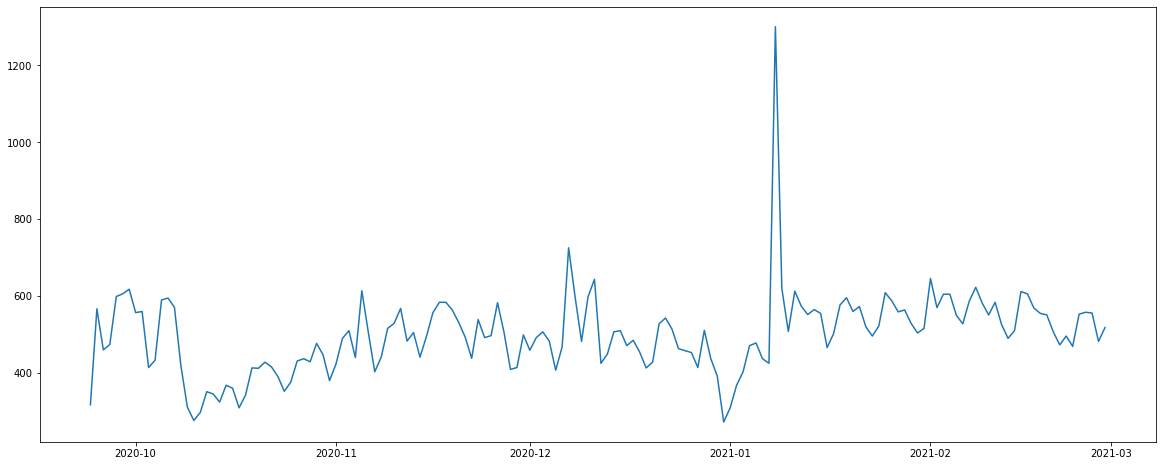

In [13]:
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

## By Category and Product
#### Which category customers interact the most? What brand the view to most?

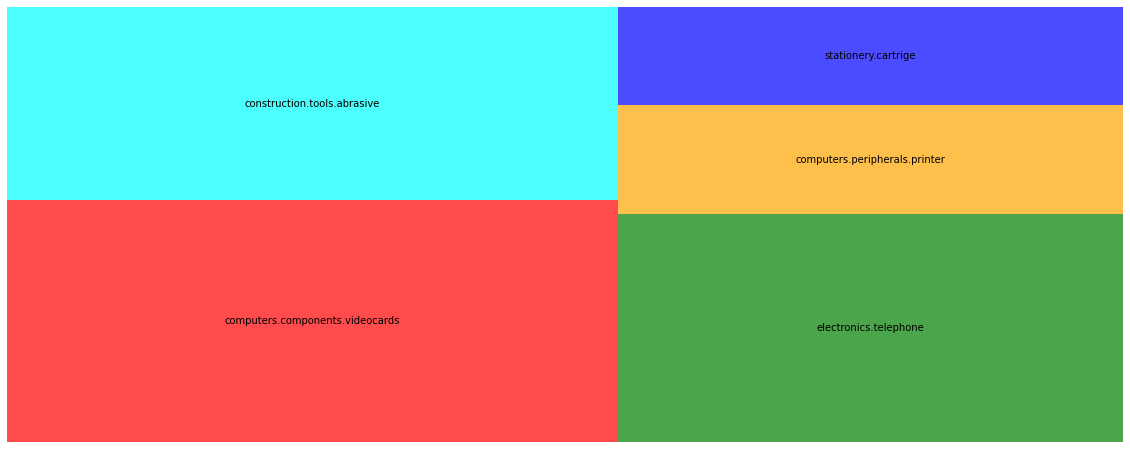

In [16]:
top_category_n = 5
top_category = df.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

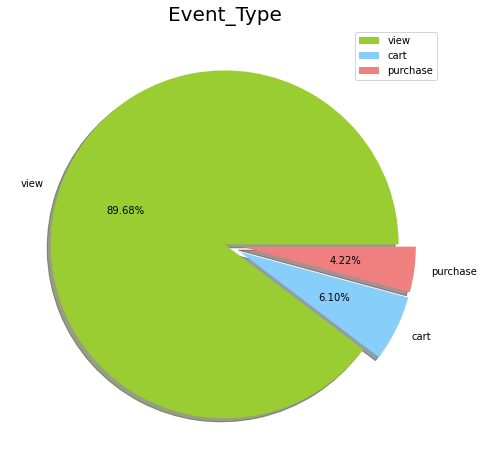

In [4]:
labels = ['view', 'cart','purchase']
size = df['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#### what item do customers buy?

In [18]:
purchase = df.loc[df['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,category_code_L1,category_code_L2
13,2020-11-08 19:32:55 UTC,purchase,1642613,2.144416e+18,25.56,1.515916e+18,dW9BO8uGGV,falcon,auto.accessories.immobilizer,auto,appliances
37,2021-01-12 13:00:00 UTC,purchase,1642613,2.144416e+18,25.56,1.515916e+18,bVBY4mrES8,falcon,auto.accessories.immobilizer,auto,appliances
52,2020-12-14 17:02:20 UTC,purchase,804258,2.144416e+18,64.62,1.515916e+18,0u6b9SADmG,fanvil,computers.peripherals.wifi,cosmetics,glove
72,2020-11-18 02:47:34 UTC,purchase,1021469,2.144416e+18,47.02,1.515916e+18,O9UR63P5Rg,fanvil,computers.peripherals.wifi,cosmetics,glove
80,2021-02-26 07:06:53 UTC,purchase,1021469,2.144416e+18,47.02,1.515916e+18,jgdy4G0Ien,fanvil,computers.peripherals.wifi,cosmetics,glove


#### What brands the customers buy?


In [19]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
kitfort,2998
lsi,2544
msi,1788
gigabyte,1741
asus,1261
palit,1077
canon,1045
amd,1020
sapphire,917


## Modeling: Predict at time of addition to shopping cart, if user will purchase a given product or not.

### Feature engineering
Restructure the data to feed into the machine learning model. For this use case, I only target the data which customers have "put" the product in the cart.

Furthermore, I add some new features into the training data set:

##### category_code_level1: category
##### category_code_level2: sub-category
##### event_weekday: weekday of the event
##### activity_count: number of activity in that session
##### is_purchased: whether the item in cart was purchased

Thus, the training data set contains every non-duplicated cart transaction (within the same session, I only keep one record for a particular product in the cart) with above mentioned new feature. I will use those features, including the original price and brand to predict whether customers will eventually purchase the item in the cart.

In [20]:
# new dataframe with only carts and purchases, drop duplicates
df_targets = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id','user_session'])
# new column "is_purchased", 1 if purchased, else 0.
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
# groupby user_session and product_id, gets whether purchase happened in the session, return original size database.
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
# wherever there is cart, drop duplicates of "user_session","product_id","is_purchased".
df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
# weekdays 0-6
df_targets['event_weekday'] = df_targets['event_time'].apply(lambda s: str(datetime.strptime(str(s)[0:10], "%Y-%m-%d").weekday()))

df_targets.dropna(how='any', inplace=True)
#split category_code
df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')
df_targets["category_code_level2"] = df_targets["category_code"].str.split(".",expand=True)[1].astype('category')


#### Prepare a dataframe for counting activity in the session (groupby user_session)



In [21]:
# new dataframe with only carts and purchases, drop duplicates
cart_purchase_users = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
cart_purchase_users.dropna(how='any', inplace=True)
# user_ids of customers who has atleast purchased or put in cart.
cart_purchase_users_all_activity = df.loc[df['user_id'].isin(cart_purchase_users['user_id'])]

In [22]:
#groupby user_session and total count of activities in a single user_session.
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
# rename column
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})

In [23]:
# merge activity_count with original dataset
df_targets = df_targets.merge(activity_in_session, on='user_session', how='left')
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)
df_targets.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,category_code_L1,category_code_L2,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2020-11-08 19:32:09 UTC,cart,1642613,2.144416e+18,25.56,1.515916e+18,dW9BO8uGGV,falcon,auto.accessories.immobilizer,auto,appliances,1.0,6,auto,accessories,4
1,2021-01-12 12:58:04 UTC,cart,1642613,2.144416e+18,25.56,1.515916e+18,bVBY4mrES8,falcon,auto.accessories.immobilizer,auto,appliances,1.0,1,auto,accessories,3
2,2020-12-14 16:52:11 UTC,cart,1021469,2.144416e+18,47.02,1.515916e+18,0u6b9SADmG,fanvil,computers.peripherals.wifi,cosmetics,glove,0.0,0,computers,peripherals,8
3,2020-12-14 17:01:45 UTC,cart,804258,2.144416e+18,64.62,1.515916e+18,0u6b9SADmG,fanvil,computers.peripherals.wifi,cosmetics,glove,1.0,0,computers,peripherals,8
4,2021-02-26 07:05:41 UTC,cart,1021469,2.144416e+18,47.02,1.515916e+18,jgdy4G0Ien,fanvil,computers.peripherals.wifi,cosmetics,glove,1.0,4,computers,peripherals,4


# Save dataset for training

In [ ]:
from google.colab import files
df_targets.to_csv('training_data.csv')
files.download('training_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modelling

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics

In [25]:
df_targets

,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,category_code_L1,category_code_L2,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2020-11-08 19:32:09 UTC,cart,1642613,2.144416e+18,25.56,1.515916e+18,dW9BO8uGGV,falcon,auto.accessories.immobilizer,auto,appliances,1.0,6,auto,accessories,4
1,2021-01-12 12:58:04 UTC,cart,1642613,2.144416e+18,25.56,1.515916e+18,bVBY4mrES8,falcon,auto.accessories.immobilizer,auto,appliances,1.0,1,auto,accessories,3
2,2020-12-14 16:52:11 UTC,cart,1021469,2.144416e+18,47.02,1.515916e+18,0u6b9SADmG,fanvil,computers.peripherals.wifi,cosmetics,glove,0.0,0,computers,peripherals,8
3,2020-12-14 17:01:45 UTC,cart,804258,2.144416e+18,64.62,1.515916e+18,0u6b9SADmG,fanvil,computers.peripherals.wifi,cosmetics,glove,1.0,0,computers,peripherals,8
4,2021-02-26 07:05:41 UTC,cart,1021469,2.144416e+18,47.02,1.515916e+18,jgdy4G0Ien,fanvil,computers.peripherals.wifi,cosmetics,glove,1.0,4,computers,peripherals,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,2020-10-23 16:56:44 UTC,cart,1682656,2.144420e+18,39.95,1.515920e+18,NP621AYvP1,wolta,construction.tools.light,construction,toys,0.0,4,construction,tools,7
48996,2020-11-27 12:52:24 UTC,cart,3759457,2.144420e+18,32.67,1.515920e+18,aVC5Gm6wGX,wolta,products.chemical,products,clocks,0.0,4,products,chemical,5
48997,2020-10-27 06:59:30 UTC,cart,1282715,2.144420e+18,27.27,1.515920e+18,iRkT36V2Xn,wolta,construction.tools.light,construction,toys,0.0,1,construction,tools,2
48998,2021-01-05 08:42:46 UTC,cart,1529454,2.144420e+18,53.48,1.515920e+18,IoOI7VXzFo,wolta,construction.tools.light,construction,toys,1.0,1,construction,tools,13


In [26]:
is_purchase_set = df_targets[df_targets['is_purchased']== 1.0]
is_purchase_set.shape[0]

22987

In [27]:
not_purchase_set = df_targets[df_targets['is_purchased']== 0.0]
not_purchase_set.shape[0]

26013

In [28]:
n_samples = 20000
is_purchase_downsampled = resample(is_purchase_set,
                                replace = False, 
                                n_samples = n_samples,
                                random_state = 27)
not_purcahase_set_downsampled = resample(not_purchase_set,
                                replace = False,
                                n_samples = n_samples,
                                random_state = 27)

In [29]:
downsampled = pd.concat([is_purchase_downsampled, not_purcahase_set_downsampled])
downsampled['is_purchased'].value_counts()

1.0    20000
0.0    20000
Name: is_purchased, dtype: int64

## Encode categorical variables

In [30]:
features = downsampled.loc[:,['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']]

In [31]:
features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level2'].copy())

is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

,brand,price,event_weekday,category_code_level1,category_code_level2,activity_count
40998,489,201.33,0,8,1,5
13665,66,16.65,2,17,14,13
48991,561,13.97,2,8,53,4
13578,63,1.57,1,8,1,3
35573,419,251.40,0,5,18,5


In [32]:
print(list(features.columns))

['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']


## Split the data


In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    is_purchased, 
                                                    test_size = 0.25, 
                                                   )

## Train the Model

In [34]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Evaluate the Model

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.6795
Precision: 0.6401400604806621
Recall: 0.8099073701167941
fbeta: 0.6825041238015509


## XGBoost with hyperoptimization

In [36]:
from hyperopt import hp
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [37]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [38]:
space={'max_depth': hp.quniform("max_depth", 5, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 1,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,5),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
    }

In [39]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                 
0.6652                                                                                                                 
  1%|▌                                                          | 1/100 [00:00<00:11,  8.41trial/s, best loss: -0.6652]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6657                                                                                                                 
SCORE:                                                                                                                 
0.6657                                                                                                                 
  3%|█▊                                                         | 3/100 [00:00<00:16,  5.82trial/s, best loss: -0.6657]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6667                                                                                                                 
  4%|██▎                                                        | 4/100 [00:00<00:14,  6.59trial/s, best loss: -0.6667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.667                                                                                                                  
SCORE:                                                                                                                 
0.6663                                                                                                                 
  6%|███▌                                                        | 6/100 [00:00<00:14,  6.48trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.665                                                                                                                  
SCORE:                                                                                                                 
0.6665                                                                                                                 
  8%|████▊                                                       | 8/100 [00:01<00:14,  6.43trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6633                                                                                                                 
SCORE:                                                                                                                 
0.667                                                                                                                  
 10%|█████▉                                                     | 10/100 [00:01<00:13,  6.53trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6638                                                                                                                 
 11%|██████▍                                                    | 11/100 [00:01<00:14,  6.27trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6659                                                                                                                 
SCORE:                                                                                                                 
0.6649                                                                                                                 
 13%|███████▋                                                   | 13/100 [00:02<00:15,  5.60trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6625                                                                                                                 
 14%|████████▎                                                  | 14/100 [00:02<00:14,  5.78trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6638                                                                                                                 
SCORE:                                                                                                                 
0.6621                                                                                                                 
 16%|█████████▍                                                 | 16/100 [00:02<00:13,  6.05trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6652                                                                                                                 
SCORE:                                                                                                                 
0.6625                                                                                                                 
 18%|██████████▌                                                | 18/100 [00:02<00:14,  5.84trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6656                                                                                                                 
SCORE:                                                                                                                 
0.6637                                                                                                                 
 20%|███████████▊                                               | 20/100 [00:03<00:13,  6.15trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6641                                                                                                                 
SCORE:                                                                                                                 
0.6654                                                                                                                 
 22%|████████████▉                                              | 22/100 [00:03<00:12,  6.10trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6654                                                                                                                 
SCORE:                                                                                                                 
0.6652                                                                                                                 
 24%|██████████████▏                                            | 24/100 [00:03<00:12,  6.13trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.665                                                                                                                  
SCORE:                                                                                                                 
0.6662                                                                                                                 
 26%|███████████████▎                                           | 26/100 [00:04<00:11,  6.65trial/s, best loss: -0.667]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6716                                                                                                                 
SCORE:                                                                                                                 
0.6662                                                                                                                 
 28%|████████████████▏                                         | 28/100 [00:04<00:10,  6.95trial/s, best loss: -0.6716]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6653                                                                                                                 
SCORE:                                                                                                                 
0.6718                                                                                                                 
 30%|█████████████████▍                                        | 30/100 [00:04<00:09,  7.08trial/s, best loss: -0.6718]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6728                                                                                                                 
SCORE:                                                                                                                 
0.6653                                                                                                                 
 32%|██████████████████▌                                       | 32/100 [00:05<00:09,  7.19trial/s, best loss: -0.6728]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6711                                                                                                                 
SCORE:                                                                                                                 
0.6651                                                                                                                 
 34%|███████████████████▋                                      | 34/100 [00:05<00:09,  7.25trial/s, best loss: -0.6728]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6657                                                                                                                 
SCORE:                                                                                                                 


C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.6657
SCORE:                                                                                                                 
0.6742                                                                                                                 
 37%|█████████████████████▍                                    | 37/100 [00:05<00:09,  6.44trial/s, best loss: -0.6742]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.666                                                                                                                  
SCORE:                                                                                                                 
0.6647                                                                                                                 
 39%|██████████████████████▌                                   | 39/100 [00:06<00:10,  6.01trial/s, best loss: -0.6742]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6656                                                                                                                 
 40%|███████████████████████▏                                  | 40/100 [00:06<00:09,  6.55trial/s, best loss: -0.6742]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6648                                                                                                                 
SCORE:                                                                                                                 
0.6653                                                                                                                 
 42%|████████████████████████▎                                 | 42/100 [00:06<00:09,  6.21trial/s, best loss: -0.6742]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6657                                                                                                                 
SCORE:                                                                                                                 
0.6661                                                                                                                 
 44%|█████████████████████████▌                                | 44/100 [00:07<00:09,  5.78trial/s, best loss: -0.6742]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6656                                                                                                                 
SCORE:                                                                                                                 
0.6652                                                                                                                 
 46%|██████████████████████████▋                               | 46/100 [00:07<00:08,  6.70trial/s, best loss: -0.6742]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6654                                                                                                                 
SCORE:                                                                                                                 
0.6646                                                                                                                 
 48%|███████████████████████████▊                              | 48/100 [00:07<00:07,  7.37trial/s, best loss: -0.6742]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6626                                                                                                                 
 49%|████████████████████████████▍                             | 49/100 [00:07<00:07,  6.76trial/s, best loss: -0.6742]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6671                                                                                                                 
SCORE:                                                                                                                 
0.6621                                                                                                                 
 51%|█████████████████████████████▌                            | 51/100 [00:08<00:08,  5.73trial/s, best loss: -0.6742]

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Shibbs\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  

SCORE:                                                                                                                 
0.6654                                                                                                                 
 52%|██████████████████████████████▏                           | 52/100 [00:08<00:08,  5.57trial/s, best loss: -0.6742]

## Catboost

In [132]:
X_train = X_train.astype('str') 
y_train = y_train.astype('str') 

In [76]:
categorical_indicies = [0,2,3,4,5]

In [87]:
from catboost import CatBoostClassifier



clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train, 
        cat_features=[0,2,3,4,5], 
        eval_set=(X_test, y_test), 
        verbose=True
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

0:	learn: 0.6743772	test: 0.6746127	best: 0.6746127 (0)	total: 168ms	remaining: 674ms
1:	learn: 0.6599207	test: 0.6604143	best: 0.6604143 (1)	total: 184ms	remaining: 276ms
2:	learn: 0.6467705	test: 0.6474634	best: 0.6474634 (2)	total: 221ms	remaining: 147ms
3:	learn: 0.6351713	test: 0.6359975	best: 0.6359975 (3)	total: 247ms	remaining: 61.9ms
4:	learn: 0.6256200	test: 0.6264345	best: 0.6264345 (4)	total: 277ms	remaining: 0us

bestTest = 0.6264345203
bestIteration = 4

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [88]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
     verbose=5,
     eval_metric='Accuracy'
)

clf.fit(X_train, y_train, 
        cat_features=[0,2,3,4,5], 
        eval_set=(X_test, y_test), 
        verbose=True
)

Learning rate set to 0.5
0:	learn: 0.6556667	test: 0.6514000	best: 0.6514000 (0)	total: 26ms	remaining: 234ms
1:	learn: 0.6662667	test: 0.6651000	best: 0.6651000 (1)	total: 42.5ms	remaining: 170ms
2:	learn: 0.6664333	test: 0.6651000	best: 0.6651000 (1)	total: 81.6ms	remaining: 190ms
3:	learn: 0.6688667	test: 0.6680000	best: 0.6680000 (3)	total: 107ms	remaining: 161ms
4:	learn: 0.6690667	test: 0.6684000	best: 0.6684000 (4)	total: 142ms	remaining: 142ms
5:	learn: 0.6697000	test: 0.6677000	best: 0.6684000 (4)	total: 173ms	remaining: 115ms
6:	learn: 0.6722667	test: 0.6681000	best: 0.6684000 (4)	total: 228ms	remaining: 97.5ms
7:	learn: 0.6727000	test: 0.6682000	best: 0.6684000 (4)	total: 260ms	remaining: 65ms
8:	learn: 0.6738000	test: 0.6695000	best: 0.6695000 (8)	total: 309ms	remaining: 34.3ms
9:	learn: 0.6738667	test: 0.6697000	best: 0.6697000 (9)	total: 335ms	remaining: 0us

bestTest = 0.6697
bestIteration = 9



## Catboost with grid search

In [89]:
import catboost as cb

In [103]:
X_train = X_train.astype({"brand":'category', "event_weekday":'category',"category_code_level1":'category',"category_code_level2":'category',"activity_count":'category'})

In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 5123 to 35382
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   brand                 30000 non-null  category
 1   price                 30000 non-null  float64 
 2   event_weekday         30000 non-null  category
 3   category_code_level1  30000 non-null  category
 4   category_code_level2  30000 non-null  category
 5   activity_count        30000 non-null  category
dtypes: category(5), float64(1)
memory usage: 673.4 KB


In [111]:
train_dataset = cb.Pool(X_train,y_train, cat_features=categorical_indicies)
test_dataset = cb.Pool(X_test,y_test, cat_features=categorical_indicies)

In [112]:
model = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')

In [113]:
grid = {'learning_rate': [0.1],
'depth': [12,10],
'l2_leaf_reg': [0.3, 0.4],
'iterations': [200]}

In [114]:
model.grid_search(grid,train_dataset)

0:	learn: 0.6703333	test: 0.6658333	best: 0.6658333 (0)	total: 94.9ms	remaining: 18.9s
1:	learn: 0.6700833	test: 0.6648333	best: 0.6658333 (0)	total: 124ms	remaining: 12.3s
2:	learn: 0.6737500	test: 0.6681667	best: 0.6681667 (2)	total: 420ms	remaining: 27.6s
3:	learn: 0.6746667	test: 0.6678333	best: 0.6681667 (2)	total: 665ms	remaining: 32.6s
4:	learn: 0.6832500	test: 0.6685000	best: 0.6685000 (4)	total: 903ms	remaining: 35.2s
5:	learn: 0.6857083	test: 0.6685000	best: 0.6685000 (4)	total: 1.13s	remaining: 36.6s
6:	learn: 0.6885000	test: 0.6708333	best: 0.6708333 (6)	total: 1.4s	remaining: 38.7s
7:	learn: 0.7005417	test: 0.6738333	best: 0.6738333 (7)	total: 1.64s	remaining: 39.4s
8:	learn: 0.7026667	test: 0.6730000	best: 0.6738333 (7)	total: 1.88s	remaining: 39.9s
9:	learn: 0.7053750	test: 0.6750000	best: 0.6750000 (9)	total: 2.1s	remaining: 40s
10:	learn: 0.7102917	test: 0.6750000	best: 0.6750000 (9)	total: 2.37s	remaining: 40.7s
11:	learn: 0.7143750	test: 0.6755000	best: 0.6755000 (11

94:	learn: 0.8437083	test: 0.6761667	best: 0.6821667 (54)	total: 19.3s	remaining: 21.4s
95:	learn: 0.8454167	test: 0.6745000	best: 0.6821667 (54)	total: 19.6s	remaining: 21.2s
96:	learn: 0.8455417	test: 0.6745000	best: 0.6821667 (54)	total: 19.6s	remaining: 20.8s
97:	learn: 0.8503750	test: 0.6750000	best: 0.6821667 (54)	total: 19.9s	remaining: 20.7s
98:	learn: 0.8513333	test: 0.6753333	best: 0.6821667 (54)	total: 20.1s	remaining: 20.5s
99:	learn: 0.8537917	test: 0.6756667	best: 0.6821667 (54)	total: 20.4s	remaining: 20.4s
100:	learn: 0.8544583	test: 0.6753333	best: 0.6821667 (54)	total: 20.6s	remaining: 20.2s
101:	learn: 0.8573333	test: 0.6743333	best: 0.6821667 (54)	total: 20.9s	remaining: 20s
102:	learn: 0.8600833	test: 0.6751667	best: 0.6821667 (54)	total: 21.1s	remaining: 19.9s
103:	learn: 0.8630417	test: 0.6728333	best: 0.6821667 (54)	total: 21.4s	remaining: 19.7s
104:	learn: 0.8647917	test: 0.6718333	best: 0.6821667 (54)	total: 21.6s	remaining: 19.6s
105:	learn: 0.8658750	test: 0

187:	learn: 0.9474583	test: 0.6640000	best: 0.6821667 (54)	total: 42s	remaining: 2.68s
188:	learn: 0.9477500	test: 0.6636667	best: 0.6821667 (54)	total: 42.3s	remaining: 2.46s
189:	learn: 0.9483333	test: 0.6645000	best: 0.6821667 (54)	total: 42.5s	remaining: 2.24s
190:	learn: 0.9488333	test: 0.6638333	best: 0.6821667 (54)	total: 42.8s	remaining: 2.02s
191:	learn: 0.9495000	test: 0.6643333	best: 0.6821667 (54)	total: 43s	remaining: 1.79s
192:	learn: 0.9505000	test: 0.6635000	best: 0.6821667 (54)	total: 43.3s	remaining: 1.57s
193:	learn: 0.9509583	test: 0.6628333	best: 0.6821667 (54)	total: 43.5s	remaining: 1.34s
194:	learn: 0.9512917	test: 0.6625000	best: 0.6821667 (54)	total: 43.8s	remaining: 1.12s
195:	learn: 0.9514583	test: 0.6616667	best: 0.6821667 (54)	total: 44s	remaining: 898ms
196:	learn: 0.9522500	test: 0.6610000	best: 0.6821667 (54)	total: 44.2s	remaining: 674ms
197:	learn: 0.9532917	test: 0.6611667	best: 0.6821667 (54)	total: 44.5s	remaining: 450ms
198:	learn: 0.9538333	test:

80:	learn: 0.8274167	test: 0.6731667	best: 0.6793333 (13)	total: 15.8s	remaining: 23.2s
81:	learn: 0.8284583	test: 0.6730000	best: 0.6793333 (13)	total: 16s	remaining: 23s
82:	learn: 0.8295417	test: 0.6716667	best: 0.6793333 (13)	total: 16.3s	remaining: 22.9s
83:	learn: 0.8294583	test: 0.6720000	best: 0.6793333 (13)	total: 16.5s	remaining: 22.7s
84:	learn: 0.8315000	test: 0.6693333	best: 0.6793333 (13)	total: 16.7s	remaining: 22.6s
85:	learn: 0.8327083	test: 0.6700000	best: 0.6793333 (13)	total: 16.9s	remaining: 22.4s
86:	learn: 0.8351667	test: 0.6701667	best: 0.6793333 (13)	total: 17.2s	remaining: 22.3s
87:	learn: 0.8366250	test: 0.6703333	best: 0.6793333 (13)	total: 17.4s	remaining: 22.1s
88:	learn: 0.8368333	test: 0.6698333	best: 0.6793333 (13)	total: 17.6s	remaining: 22s
89:	learn: 0.8376667	test: 0.6700000	best: 0.6793333 (13)	total: 17.9s	remaining: 21.9s
90:	learn: 0.8384167	test: 0.6703333	best: 0.6793333 (13)	total: 18.1s	remaining: 21.7s
91:	learn: 0.8390833	test: 0.6701667	b

173:	learn: 0.9415417	test: 0.6738333	best: 0.6793333 (13)	total: 38.1s	remaining: 5.68s
174:	learn: 0.9420000	test: 0.6726667	best: 0.6793333 (13)	total: 38.3s	remaining: 5.47s
175:	learn: 0.9425417	test: 0.6736667	best: 0.6793333 (13)	total: 38.6s	remaining: 5.26s
176:	learn: 0.9429167	test: 0.6733333	best: 0.6793333 (13)	total: 38.8s	remaining: 5.04s
177:	learn: 0.9435833	test: 0.6733333	best: 0.6793333 (13)	total: 39s	remaining: 4.82s
178:	learn: 0.9447500	test: 0.6736667	best: 0.6793333 (13)	total: 39.3s	remaining: 4.61s
179:	learn: 0.9455417	test: 0.6733333	best: 0.6793333 (13)	total: 39.5s	remaining: 4.39s
180:	learn: 0.9463333	test: 0.6736667	best: 0.6793333 (13)	total: 39.8s	remaining: 4.17s
181:	learn: 0.9467917	test: 0.6716667	best: 0.6793333 (13)	total: 40s	remaining: 3.96s
182:	learn: 0.9477083	test: 0.6708333	best: 0.6793333 (13)	total: 40.3s	remaining: 3.74s
183:	learn: 0.9482083	test: 0.6703333	best: 0.6793333 (13)	total: 40.5s	remaining: 3.52s
184:	learn: 0.9487500	tes

66:	learn: 0.7489583	test: 0.6806667	best: 0.6810000 (64)	total: 5.15s	remaining: 10.2s
67:	learn: 0.7498750	test: 0.6793333	best: 0.6810000 (64)	total: 5.24s	remaining: 10.2s
68:	learn: 0.7499167	test: 0.6803333	best: 0.6810000 (64)	total: 5.26s	remaining: 9.99s
69:	learn: 0.7505417	test: 0.6806667	best: 0.6810000 (64)	total: 5.34s	remaining: 9.92s
70:	learn: 0.7507500	test: 0.6801667	best: 0.6810000 (64)	total: 5.43s	remaining: 9.86s
71:	learn: 0.7507083	test: 0.6801667	best: 0.6810000 (64)	total: 5.45s	remaining: 9.69s
72:	learn: 0.7512083	test: 0.6801667	best: 0.6810000 (64)	total: 5.54s	remaining: 9.64s
73:	learn: 0.7510000	test: 0.6806667	best: 0.6810000 (64)	total: 5.63s	remaining: 9.59s
74:	learn: 0.7513750	test: 0.6806667	best: 0.6810000 (64)	total: 5.71s	remaining: 9.52s
75:	learn: 0.7513750	test: 0.6805000	best: 0.6810000 (64)	total: 5.8s	remaining: 9.47s
76:	learn: 0.7522500	test: 0.6816667	best: 0.6816667 (76)	total: 5.89s	remaining: 9.41s
77:	learn: 0.7521667	test: 0.6816

161:	learn: 0.8240417	test: 0.6785000	best: 0.6820000 (78)	total: 13.2s	remaining: 3.09s
162:	learn: 0.8254167	test: 0.6770000	best: 0.6820000 (78)	total: 13.2s	remaining: 3.01s
163:	learn: 0.8261250	test: 0.6761667	best: 0.6820000 (78)	total: 13.3s	remaining: 2.93s
164:	learn: 0.8266667	test: 0.6768333	best: 0.6820000 (78)	total: 13.4s	remaining: 2.85s
165:	learn: 0.8270000	test: 0.6770000	best: 0.6820000 (78)	total: 13.5s	remaining: 2.77s
166:	learn: 0.8270417	test: 0.6768333	best: 0.6820000 (78)	total: 13.6s	remaining: 2.69s
167:	learn: 0.8285833	test: 0.6773333	best: 0.6820000 (78)	total: 13.7s	remaining: 2.61s
168:	learn: 0.8296667	test: 0.6766667	best: 0.6820000 (78)	total: 13.8s	remaining: 2.53s
169:	learn: 0.8303750	test: 0.6768333	best: 0.6820000 (78)	total: 13.9s	remaining: 2.45s
170:	learn: 0.8315833	test: 0.6763333	best: 0.6820000 (78)	total: 14s	remaining: 2.37s
171:	learn: 0.8324167	test: 0.6765000	best: 0.6820000 (78)	total: 14.1s	remaining: 2.29s
172:	learn: 0.8330417	t

55:	learn: 0.7329167	test: 0.6806667	best: 0.6818333 (53)	total: 4.13s	remaining: 10.6s
56:	learn: 0.7327500	test: 0.6810000	best: 0.6818333 (53)	total: 4.21s	remaining: 10.6s
57:	learn: 0.7329167	test: 0.6810000	best: 0.6818333 (53)	total: 4.23s	remaining: 10.4s
58:	learn: 0.7327500	test: 0.6820000	best: 0.6820000 (58)	total: 4.32s	remaining: 10.3s
59:	learn: 0.7328750	test: 0.6820000	best: 0.6820000 (58)	total: 4.35s	remaining: 10.2s
60:	learn: 0.7328750	test: 0.6820000	best: 0.6820000 (58)	total: 4.38s	remaining: 9.97s
61:	learn: 0.7336667	test: 0.6825000	best: 0.6825000 (61)	total: 4.46s	remaining: 9.93s
62:	learn: 0.7340417	test: 0.6815000	best: 0.6825000 (61)	total: 4.55s	remaining: 9.89s
63:	learn: 0.7343333	test: 0.6815000	best: 0.6825000 (61)	total: 4.63s	remaining: 9.85s
64:	learn: 0.7342917	test: 0.6818333	best: 0.6825000 (61)	total: 4.65s	remaining: 9.67s
65:	learn: 0.7353333	test: 0.6823333	best: 0.6825000 (61)	total: 4.74s	remaining: 9.61s
66:	learn: 0.7354167	test: 0.682

149:	learn: 0.8129167	test: 0.6790000	best: 0.6841667 (82)	total: 12.1s	remaining: 4.02s
150:	learn: 0.8135000	test: 0.6781667	best: 0.6841667 (82)	total: 12.2s	remaining: 3.94s
151:	learn: 0.8145417	test: 0.6781667	best: 0.6841667 (82)	total: 12.2s	remaining: 3.87s
152:	learn: 0.8159167	test: 0.6788333	best: 0.6841667 (82)	total: 12.3s	remaining: 3.79s
153:	learn: 0.8161667	test: 0.6773333	best: 0.6841667 (82)	total: 12.4s	remaining: 3.71s
154:	learn: 0.8185417	test: 0.6773333	best: 0.6841667 (82)	total: 12.5s	remaining: 3.64s
155:	learn: 0.8195417	test: 0.6770000	best: 0.6841667 (82)	total: 12.6s	remaining: 3.56s
156:	learn: 0.8199583	test: 0.6778333	best: 0.6841667 (82)	total: 12.7s	remaining: 3.48s
157:	learn: 0.8208750	test: 0.6781667	best: 0.6841667 (82)	total: 12.8s	remaining: 3.4s
158:	learn: 0.8218333	test: 0.6786667	best: 0.6841667 (82)	total: 12.9s	remaining: 3.32s
159:	learn: 0.8222917	test: 0.6776667	best: 0.6841667 (82)	total: 13s	remaining: 3.25s
160:	learn: 0.8222083	te

43:	learn: 0.7349500	test: 0.6781000	best: 0.6793000 (29)	total: 3.4s	remaining: 12.1s
44:	learn: 0.7351000	test: 0.6778000	best: 0.6793000 (29)	total: 3.48s	remaining: 12s
45:	learn: 0.7354500	test: 0.6777000	best: 0.6793000 (29)	total: 3.55s	remaining: 11.9s
46:	learn: 0.7365500	test: 0.6782000	best: 0.6793000 (29)	total: 3.63s	remaining: 11.8s
47:	learn: 0.7364000	test: 0.6773000	best: 0.6793000 (29)	total: 3.72s	remaining: 11.8s
48:	learn: 0.7370500	test: 0.6772000	best: 0.6793000 (29)	total: 3.8s	remaining: 11.7s
49:	learn: 0.7371000	test: 0.6774000	best: 0.6793000 (29)	total: 3.83s	remaining: 11.5s
50:	learn: 0.7381000	test: 0.6777000	best: 0.6793000 (29)	total: 3.91s	remaining: 11.4s
51:	learn: 0.7397500	test: 0.6775000	best: 0.6793000 (29)	total: 3.99s	remaining: 11.3s
52:	learn: 0.7407000	test: 0.6772000	best: 0.6793000 (29)	total: 4.07s	remaining: 11.3s
53:	learn: 0.7415000	test: 0.6767000	best: 0.6793000 (29)	total: 4.16s	remaining: 11.2s
54:	learn: 0.7419000	test: 0.6759000

137:	learn: 0.8212500	test: 0.6740000	best: 0.6793000 (29)	total: 11.1s	remaining: 4.99s
138:	learn: 0.8217000	test: 0.6740000	best: 0.6793000 (29)	total: 11.2s	remaining: 4.91s
139:	learn: 0.8231000	test: 0.6745000	best: 0.6793000 (29)	total: 11.3s	remaining: 4.83s
140:	learn: 0.8257500	test: 0.6741000	best: 0.6793000 (29)	total: 11.4s	remaining: 4.75s
141:	learn: 0.8275500	test: 0.6740000	best: 0.6793000 (29)	total: 11.4s	remaining: 4.67s
142:	learn: 0.8278500	test: 0.6735000	best: 0.6793000 (29)	total: 11.5s	remaining: 4.6s
143:	learn: 0.8281500	test: 0.6738000	best: 0.6793000 (29)	total: 11.6s	remaining: 4.52s
144:	learn: 0.8294500	test: 0.6743000	best: 0.6793000 (29)	total: 11.7s	remaining: 4.44s
145:	learn: 0.8306500	test: 0.6743000	best: 0.6793000 (29)	total: 11.8s	remaining: 4.36s
146:	learn: 0.8312500	test: 0.6746000	best: 0.6793000 (29)	total: 11.9s	remaining: 4.29s
147:	learn: 0.8315000	test: 0.6744000	best: 0.6793000 (29)	total: 12s	remaining: 4.21s
148:	learn: 0.8331500	te

30:	learn: 0.7199500	test: 0.6888000	best: 0.6894000 (24)	total: 2.46s	remaining: 13.4s
31:	learn: 0.7206500	test: 0.6869000	best: 0.6894000 (24)	total: 2.54s	remaining: 13.3s
32:	learn: 0.7225000	test: 0.6870000	best: 0.6894000 (24)	total: 2.62s	remaining: 13.3s
33:	learn: 0.7233500	test: 0.6871000	best: 0.6894000 (24)	total: 2.71s	remaining: 13.3s
34:	learn: 0.7241500	test: 0.6884000	best: 0.6894000 (24)	total: 2.8s	remaining: 13.2s
35:	learn: 0.7258000	test: 0.6870000	best: 0.6894000 (24)	total: 2.89s	remaining: 13.2s
36:	learn: 0.7259000	test: 0.6864000	best: 0.6894000 (24)	total: 2.98s	remaining: 13.1s
37:	learn: 0.7292500	test: 0.6867000	best: 0.6894000 (24)	total: 3.06s	remaining: 13s
38:	learn: 0.7298500	test: 0.6868000	best: 0.6894000 (24)	total: 3.14s	remaining: 13s
39:	learn: 0.7300500	test: 0.6872000	best: 0.6894000 (24)	total: 3.23s	remaining: 12.9s
40:	learn: 0.7308500	test: 0.6877000	best: 0.6894000 (24)	total: 3.31s	remaining: 12.8s
41:	learn: 0.7312500	test: 0.6874000	

125:	learn: 0.8193500	test: 0.6857000	best: 0.6894000 (24)	total: 10.4s	remaining: 6.1s
126:	learn: 0.8205500	test: 0.6854000	best: 0.6894000 (24)	total: 10.5s	remaining: 6.02s
127:	learn: 0.8224500	test: 0.6849000	best: 0.6894000 (24)	total: 10.6s	remaining: 5.94s
128:	learn: 0.8236000	test: 0.6840000	best: 0.6894000 (24)	total: 10.7s	remaining: 5.86s
129:	learn: 0.8249000	test: 0.6831000	best: 0.6894000 (24)	total: 10.7s	remaining: 5.78s
130:	learn: 0.8257500	test: 0.6846000	best: 0.6894000 (24)	total: 10.8s	remaining: 5.7s
131:	learn: 0.8265000	test: 0.6842000	best: 0.6894000 (24)	total: 10.9s	remaining: 5.63s
132:	learn: 0.8268500	test: 0.6842000	best: 0.6894000 (24)	total: 11s	remaining: 5.54s
133:	learn: 0.8280500	test: 0.6831000	best: 0.6894000 (24)	total: 11.1s	remaining: 5.46s
134:	learn: 0.8285000	test: 0.6834000	best: 0.6894000 (24)	total: 11.2s	remaining: 5.38s
135:	learn: 0.8296500	test: 0.6834000	best: 0.6894000 (24)	total: 11.3s	remaining: 5.3s
136:	learn: 0.8297500	test

19:	learn: 0.7075500	test: 0.6754000	best: 0.6755000 (18)	total: 1.5s	remaining: 13.5s
20:	learn: 0.7082000	test: 0.6743000	best: 0.6755000 (18)	total: 1.59s	remaining: 13.5s
21:	learn: 0.7077000	test: 0.6754000	best: 0.6755000 (18)	total: 1.6s	remaining: 12.9s
22:	learn: 0.7079000	test: 0.6748000	best: 0.6755000 (18)	total: 1.63s	remaining: 12.6s
23:	learn: 0.7107000	test: 0.6747000	best: 0.6755000 (18)	total: 1.72s	remaining: 12.6s
24:	learn: 0.7127500	test: 0.6751000	best: 0.6755000 (18)	total: 1.81s	remaining: 12.7s
25:	learn: 0.7129000	test: 0.6747000	best: 0.6755000 (18)	total: 1.91s	remaining: 12.8s
26:	learn: 0.7128500	test: 0.6749000	best: 0.6755000 (18)	total: 1.94s	remaining: 12.4s
27:	learn: 0.7148000	test: 0.6754000	best: 0.6755000 (18)	total: 2.02s	remaining: 12.4s
28:	learn: 0.7172000	test: 0.6751000	best: 0.6755000 (18)	total: 2.11s	remaining: 12.5s
29:	learn: 0.7176500	test: 0.6758000	best: 0.6758000 (29)	total: 2.2s	remaining: 12.5s
30:	learn: 0.7191500	test: 0.674600

113:	learn: 0.8039000	test: 0.6760000	best: 0.6780000 (38)	total: 8.87s	remaining: 6.69s
114:	learn: 0.8055500	test: 0.6765000	best: 0.6780000 (38)	total: 8.96s	remaining: 6.62s
115:	learn: 0.8054500	test: 0.6772000	best: 0.6780000 (38)	total: 9.05s	remaining: 6.55s
116:	learn: 0.8070500	test: 0.6758000	best: 0.6780000 (38)	total: 9.14s	remaining: 6.49s
117:	learn: 0.8088000	test: 0.6771000	best: 0.6780000 (38)	total: 9.23s	remaining: 6.42s
118:	learn: 0.8098500	test: 0.6786000	best: 0.6786000 (118)	total: 9.32s	remaining: 6.34s
119:	learn: 0.8129500	test: 0.6771000	best: 0.6786000 (118)	total: 9.4s	remaining: 6.27s
120:	learn: 0.8133500	test: 0.6779000	best: 0.6786000 (118)	total: 9.48s	remaining: 6.19s
121:	learn: 0.8159000	test: 0.6790000	best: 0.6790000 (121)	total: 9.57s	remaining: 6.12s
122:	learn: 0.8160500	test: 0.6783000	best: 0.6790000 (121)	total: 9.66s	remaining: 6.05s
123:	learn: 0.8175000	test: 0.6777000	best: 0.6790000 (121)	total: 9.74s	remaining: 5.97s
124:	learn: 0.81

{'params': {'depth': 10,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.4},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

### Best parameters

In [100]:
model.get_params()

{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 10,
 'iterations': 200,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.2}

# END

In [17]:
df_targets = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id','user_session'])

In [30]:
df_targets

,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,category_code_L1,category_code_L2,is_purchased,event_weekday
18,2020-11-08 19:32:09 UTC,cart,1642613,2.144416e+18,25.56,1.515916e+18,dW9BO8uGGV,falcon,auto.accessories.immobilizer,auto,appliances,1.0,6
39,2021-01-12 12:58:04 UTC,cart,1642613,2.144416e+18,25.56,1.515916e+18,bVBY4mrES8,falcon,auto.accessories.immobilizer,auto,appliances,1.0,1
54,2020-12-14 16:52:11 UTC,cart,1021469,2.144416e+18,47.02,1.515916e+18,0u6b9SADmG,fanvil,computers.peripherals.joystick,"computers,gaming",electronics,0.0,0
58,2020-12-14 17:01:45 UTC,cart,804258,2.144416e+18,64.62,1.515916e+18,0u6b9SADmG,fanvil,computers.peripherals.joystick,"computers,gaming",electronics,1.0,0
79,2021-02-26 07:05:41 UTC,cart,1021469,2.144416e+18,47.02,1.515916e+18,jgdy4G0Ien,fanvil,computers.peripherals.joystick,"computers,gaming",electronics,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885033,2020-10-23 16:56:44 UTC,cart,1682656,2.144420e+18,39.95,1.515920e+18,NP621AYvP1,wolta,construction.tools.light,construction,toys,0.0,4
885038,2020-11-27 12:52:24 UTC,cart,3759457,2.144420e+18,32.67,1.515920e+18,aVC5Gm6wGX,wolta,products.chemical,products,clocks,0.0,4
885066,2020-10-27 06:59:30 UTC,cart,1282715,2.144420e+18,27.27,1.515920e+18,iRkT36V2Xn,wolta,construction.tools.light,construction,toys,0.0,1
885080,2021-01-05 08:42:46 UTC,cart,1529454,2.144420e+18,53.48,1.515920e+18,IoOI7VXzFo,wolta,construction.tools.light,construction,toys,1.0,1


In [20]:
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)

In [22]:
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")

In [28]:
df_targets["event_type"].nunique()

1

In [26]:
df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])


In [29]:
df_targets['event_weekday'] = df_targets['event_time'].apply(lambda s: str(datetime.strptime(str(s)[0:10], "%Y-%m-%d").weekday()))

In [49]:
cart_purchase_users = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])

In [51]:
cart_purchase_users.dropna(how='any', inplace=True)

In [53]:
cart_purchase_users_all_activity = df.loc[df['user_id'].isin(cart_purchase_users['user_id'])]

In [54]:
cart_purchase_users_all_activity

,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,category_code_L1,category_code_L2
0,2020-11-20 15:19:47 UTC,view,1642613,2.144416e+18,25.56,1.515916e+18,9cdf5Yzi4W,falcon,auto.accessories.immobilizer,auto,appliances
1,2020-10-18 18:29:34 UTC,view,1642613,2.144416e+18,25.56,1.515916e+18,DomDtlfN2x,falcon,auto.accessories.immobilizer,auto,appliances
2,2020-11-20 19:18:47 UTC,view,1642613,2.144416e+18,25.56,1.515916e+18,N5U9nr75XP,falcon,auto.accessories.immobilizer,auto,appliances
3,2020-12-20 01:25:28 UTC,view,1642613,2.144416e+18,25.56,1.515916e+18,apG36IgOcf,falcon,auto.accessories.immobilizer,auto,appliances
4,2021-02-24 15:59:50 UTC,view,1642613,2.144416e+18,25.56,1.515916e+18,7CZ3WuPoU3,falcon,auto.accessories.immobilizer,auto,appliances
...,...,...,...,...,...,...,...,...,...,...,...
885119,2020-12-02 14:01:32 UTC,view,1529443,2.144420e+18,13.24,1.515920e+18,D2iN8WaxdK,wolta,construction.tools.light,construction,toys
885120,2021-01-06 13:14:08 UTC,view,1529453,2.144420e+18,66.19,1.515920e+18,IoOI7VXzFo,wolta,construction.tools.light,construction,toys
885121,2020-10-08 12:10:00 UTC,view,864264,2.144420e+18,20.63,1.515920e+18,kQHdSa7WoM,wuw,electronics.telephone.cover,electronics,toolkit
885122,2020-10-08 12:10:02 UTC,view,864264,2.144420e+18,20.63,1.515920e+18,GAylf4yJHR,wuw,electronics.telephone.cover,electronics,toolkit


In [55]:
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()

In [58]:
activity_in_session

,user_session,activity_count
0,000AMhYaQu,1
1,001HttdHUk,1
2,001P7lK0Pt,2
3,001RxUtFJa,1
4,002DmERG1w,1
...,...,...
473340,zzxngTdVaG,1
473341,zzy0qXtxYX,1
473342,zzy6W7KylP,1
473343,zzzKOuAubK,2


In [57]:
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})

In [59]:
activity_in_session.isnull().sum()

user_session      0
activity_count    0
dtype: int64

In [60]:
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)

KeyError: 'activity_count'

In [52]:
cart_purchase_users

,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,category_code_L1,category_code_L2
13,2020-11-08 19:32:55 UTC,purchase,1642613,2.144416e+18,25.56,1.515916e+18,dW9BO8uGGV,falcon,auto.accessories.immobilizer,auto,appliances
37,2021-01-12 13:00:00 UTC,purchase,1642613,2.144416e+18,25.56,1.515916e+18,bVBY4mrES8,falcon,auto.accessories.immobilizer,auto,appliances
52,2020-12-14 17:02:20 UTC,purchase,804258,2.144416e+18,64.62,1.515916e+18,0u6b9SADmG,fanvil,computers.peripherals.joystick,"computers,gaming",electronics
72,2020-11-18 02:47:34 UTC,purchase,1021469,2.144416e+18,47.02,1.515916e+18,O9UR63P5Rg,fanvil,computers.peripherals.joystick,"computers,gaming",electronics
79,2021-02-26 07:05:41 UTC,cart,1021469,2.144416e+18,47.02,1.515916e+18,jgdy4G0Ien,fanvil,computers.peripherals.joystick,"computers,gaming",electronics
...,...,...,...,...,...,...,...,...,...,...,...
847334,2021-02-16 12:14:49 UTC,purchase,503243,2.144416e+18,78.30,1.515916e+18,LM5SokF09n,ombra,personalhygiene.deodorent,personalhygiene,desktop
847856,2021-01-08 16:01:22 UTC,purchase,1851634,2.144416e+18,39.51,1.515916e+18,cY3urkAFkT,onkron,electronics.video.tv_mount,electronics,videorecorder
847861,2021-01-08 15:58:48 UTC,cart,1851634,2.144416e+18,39.51,1.515916e+18,DSyQIFKIX0,onkron,electronics.video.tv_mount,electronics,videorecorder
848264,2020-11-05 07:59:09 UTC,cart,456468,2.144416e+18,38.10,1.515916e+18,VxA0sPd7k7,optim,computers.network.router,computers,networking


In [ ]:
data = {'brand': [204], 'price': [137],'event_weekday' : [202], 'category_code_level1': [2], 'category_code_level2': [51] ,'activity_count': [16] }  

In [ ]:
df = pd.DataFrame(data)

In [ ]:
new_customer = np.array(['3', '30', '0', '1', '1', '4'])

In [ ]:
'brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count'